## Week 06 In Class Assignment
### Regression, SVM, Neural Networks in R
#### Author: G. Gordon

NB. In class references have been used as requested including code

In [1]:
# Import the Data
train.data = read.csv("homeworkTrain.csv", header=F)
test.data = read.csv("homeworkTest.csv", header=F)

In [3]:
# Have a look at the data
"Training Set"
head(train.data)
"Test Set"
head(test.data)

[1] "Training Set"

,V1,V2,V3,V4
1,0.2879303,0.7341361,0.7556002,16.54247
2,0.2909103,0.3172334,0.6802567,13.04822
3,0.9694784,0.5068852,0.4053819,15.67479
4,0.186544,0.148853,0.9125063,12.6434
5,0.3336404,0.2991701,0.8440536,13.21514
6,0.3456881,0.6626665,0.8340489,15.75158


[1] "Test Set"

,V1,V2,V3,V4
1,0.1735165,0.6124014,0.05369461,15.58912
2,0.6262476,0.4952835,0.6988383,16.00405
3,0.1048847,0.9719626,0.5514053,22.20358
4,0.5676899,0.2416946,0.8891438,15.02003
5,0.5628262,0.5149687,0.03190279,15.15275
6,0.6102789,0.5169022,0.3068901,15.60651


In [4]:
"Summary Statistcs for Test and Training Set"
# Have a look at the data
"Training Set"
head(summary(train.data))
"Test Set"
head((test.data))

[1] "Summary Statistcs"

[1] "Training Set"

,V1,V2,V3,V4
,Min. :0.00416,Min. :0.03183,Min. :0.002938,Min. :12.21
,1st Qu.:0.25213,1st Qu.:0.20035,1st Qu.:0.221765,1st Qu.:13.17
,Median :0.46899,Median :0.51933,Median :0.495974,Median :14.55
,Mean :0.46602,Mean :0.48569,Mean :0.502073,Mean :15.37
,3rd Qu.:0.65901,3rd Qu.:0.73277,3rd Qu.:0.770337,3rd Qu.:16.75
,Max. :0.98034,Max. :0.96962,Max. :0.987168,Max. :23.91


[1] "Test Set"

,V1,V2,V3,V4
1,0.1735165,0.6124014,0.05369461,15.58912
2,0.6262476,0.4952835,0.6988383,16.00405
3,0.1048847,0.9719626,0.5514053,22.20358
4,0.5676899,0.2416946,0.8891438,15.02003
5,0.5628262,0.5149687,0.03190279,15.15275
6,0.6102789,0.5169022,0.3068901,15.60651


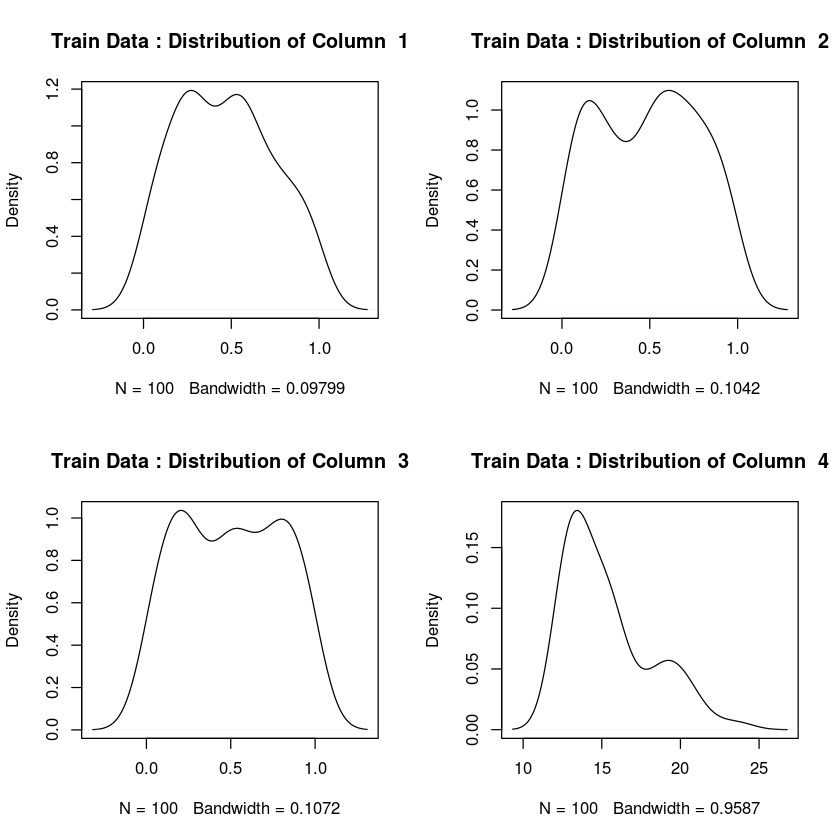

In [11]:
par(mfrow=c(2,2))
for(i in 1:ncol(train.data)){
    plot(density(train.data[,i]),main=paste("Train Data : Distribution of Column ",i))
}

### Simple Linear Regression

Regression models operate based on assumptions and are 
better applied when the assumption of each type of regression is met and verified.
Visualizations and other means to identify relationships between variables and variable data types
also assist this process. However, this assignment only requests the use of a blind model 
i.e. assuming all features are important and that the model is indeed linear

In [12]:
train.regression.fit = lm(V4 ~ ., data=train.data)

[1] "Possible Model"


Call:
lm(formula = V4 ~ ., data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4951 -0.9749 -0.1416  0.8869  3.3303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.0597     0.3238  31.070  < 2e-16 ***
V1            1.9786     0.4059   4.874 4.32e-06 ***
V2            8.1718     0.3834  21.316  < 2e-16 ***
V3            0.8273     0.3704   2.233   0.0279 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.092 on 96 degrees of freedom
Multiple R-squared:  0.8478,	Adjusted R-squared:  0.843 
F-statistic: 178.2 on 3 and 96 DF,  p-value: < 2.2e-16


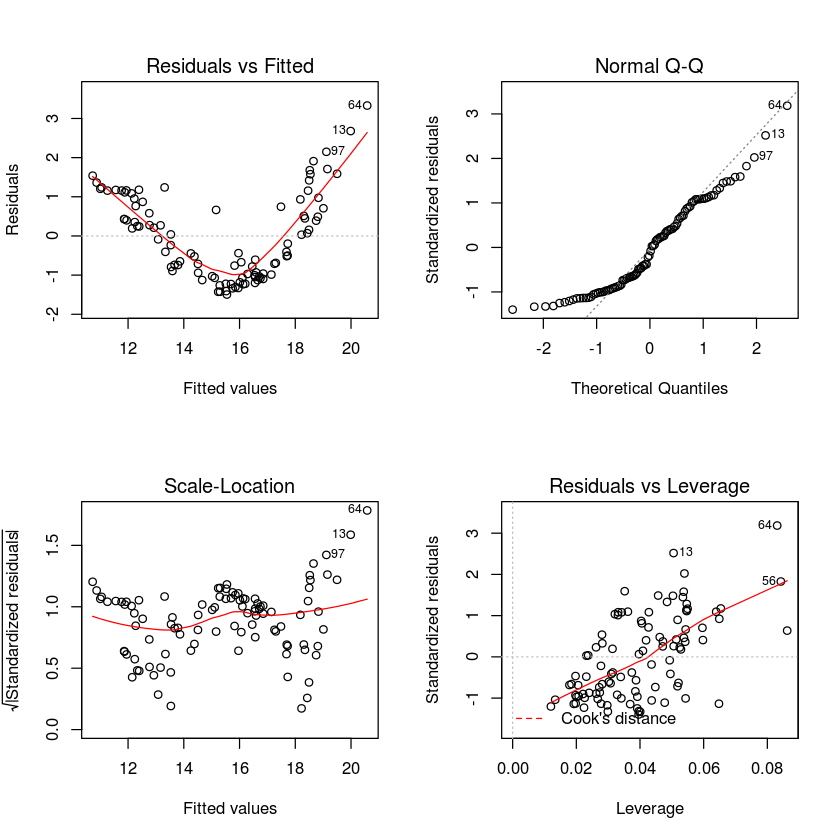

In [44]:
"Possible Model"
summary(train.regression.fit)
par(mfrow=c(2,2))
plot(train.regression.fit)

In [30]:
# Predict on test data set using regression model
train.regression.pred = predict(train.regression.fit,test.data[,1:3])
# Determine the mean absolute percentage error
model.regression.error=mean(100*abs(test.data[,4] - train.regression.pred)/test.data[,4])
paste('Mean Absolute % Error for Regression Model : ',model.regression.error,'%')

[1] "Mean Absolute % Error for Regression Model :  7.55434149593883 %"

### Support Vector Machines

In [67]:
library(e1071) # Load svm from library


In [66]:
#Build SVM Model
train.svm.fit = svm(train.data[,1:3],train.data[,4])
plot(train.svm.fit,train.data[,1:3],"V1 ~ V2")
# Predict using test data
train.svm.pred = predict(train.svm.fit,test.data[,1:3])
# Determine the mean absolute percentage error
model.svm.error=mean(100*abs(test.data[,4] - train.svm.pred)/test.data[,4])
paste('Mean Absolute % Error for SVM : ',model.svm.error,'%')

[1] "Mean Absolute % Error for SVM :  6.54579535777083 %"

### Neural Networks

In [69]:
library(neuralnet)

Loading required package: grid


In [90]:
train.nn.fit = neuralnet(V4~V1+V2+V3,data=train.data,hidden=4,learningrate=0.01,algorithm="backprop")
train.nn.pred = compute(train.nn.fit,test.data[,1:3])$net.result
model.nn.error=mean(100*abs(test.data[,4] - train.nn.pred)/test.data[,4])
paste('Mean Absolute % Error for Neural Network (4 hidden) : ',model.nn.error,'%')

[1] "Mean Absolute % Error for Neural Network (4 hidden) :  10.7505596129476 %"

In [94]:
train.nn.fit = neuralnet(V4~V1+V2+V3,data=train.data,hidden=0,learningrate=0.01,algorithm="backprop")

In [85]:
library(RSNNS)
library('devtools')
#(Source : )
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')


SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef


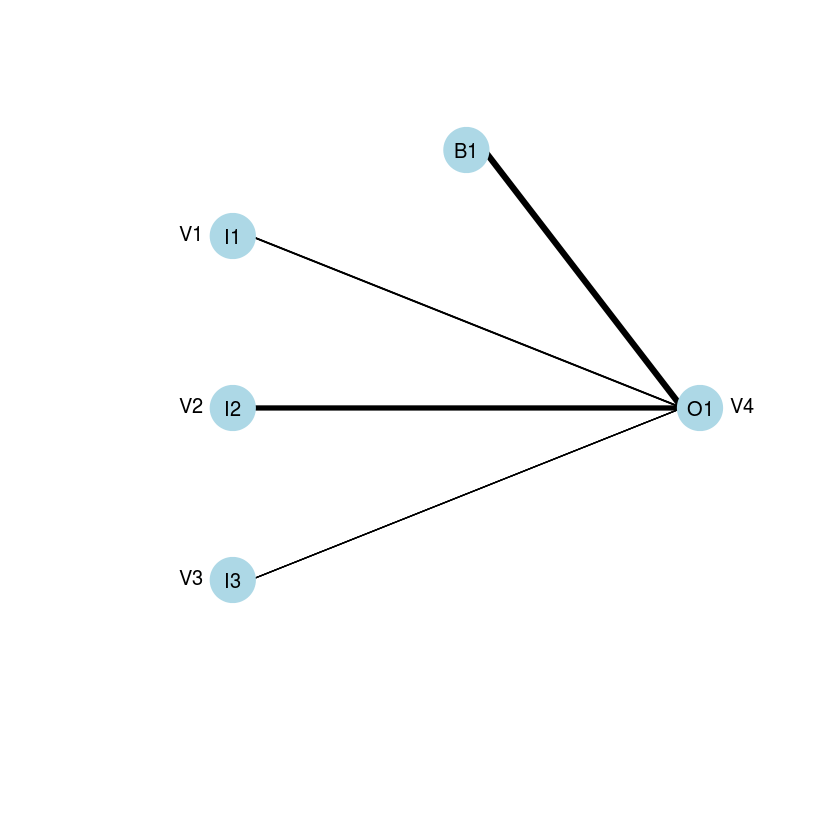

In [97]:
set.seed(23)
plot.nnet(train.nn.fit)

In [95]:
train.nn.pred = compute(train.nn.fit,test.data[,1:3])$net.result

In [96]:
model.nn.error=mean(100*abs(test.data[,4] - train.nn.pred)/test.data[,4])
paste('Mean Absolute % Error for Neural Network (0 hidden) : ',model.nn.error,'%')

[1] "Mean Absolute % Error for Neural Network (0 hidden) :  7.55398572590002 %"

### Conclusion

All models typically performed well on the test data with SVM performing the best.
The mean absolute error starting with best performance:
1. SVM = 6.54% 
2. Neural Network (0 hidden) = 7.5539857 %
3. Linear Regression =  7.55434149 %
4. Neural Network (4 hidden) with 10.75% .

The difference between the error of the neural network model (4 hidden) and the other models imply that the data is more linear.